In [18]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using SparseArrays
using Plots

In [107]:
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-4
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
S[abs.(S) .< ϵ] .= 0                    #zero out values smaller than treshold
Sr = S[abs.(S) .!= 0]                   #put nonzero values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(z)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)


1×2201 Matrix{Float64}:
 -143.634  -141.874  -140.127  …  89.2434  90.7544  92.2781  89.2433

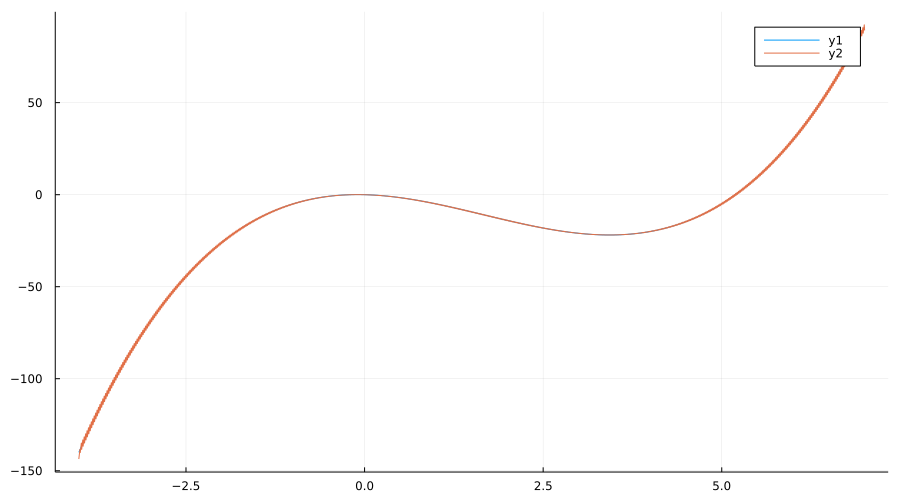

In [108]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [118]:
#sin function
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 100*sin.(2*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-15
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
S[abs.(S) .< ϵ] .= 0                    #zero out values smaller than treshold
Sr = S[abs.(S) .!= 0]                   #put nonzero values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(z)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
Sr

200-element Vector{Float64}:
 10049.87562112089
  9999.999999999996
     6.478413070055438e-12
     3.810560467583844e-12
     3.717174270478949e-12
     3.140011727012293e-12
     3.0966174851611795e-12
     2.8260518192582844e-12
     2.8239771365415325e-12
     2.7352398471428785e-12
     2.6022107582687576e-12
     2.525013022445909e-12
     2.407255446617894e-12
     ⋮
     1.004063139057542e-12
     1.004063139057542e-12
     1.004063139057542e-12
     1.004063139057542e-12
     9.99185707161094e-13
     6.480526193979229e-13
     5.676292770598984e-13
     5.063358550409272e-13
     4.966265281012934e-13
     4.925588265289716e-13
     4.1813914178699316e-13
     2.479306127906291e-13

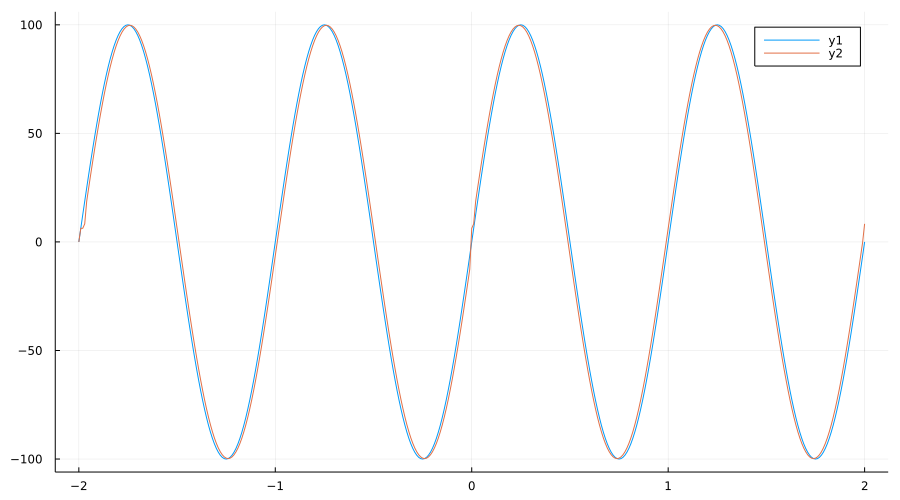

In [119]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [136]:
#sin function higher frequency
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 100*sin.(2*10*π*T)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e-12
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
S[abs.(S) .< ϵ] .= 0                    #zero out values smaller than treshold
Sr = S[abs.(S) .!= 0]                   #put nonzero values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(z)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
Sr

184-element Vector{Float64}:
 10049.875621120891
 10000.000000000002
     1.0773131721114212e-11
     1.0490259847713318e-11
     1.0346386999402666e-11
     1.0201875733659249e-11
     8.926082647349968e-12
     7.285564296446665e-12
     6.930042484966403e-12
     6.760189091653981e-12
     6.527181994423575e-12
     6.470850590829638e-12
     6.457189644375128e-12
     ⋮
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12
     1.0041087385990913e-12

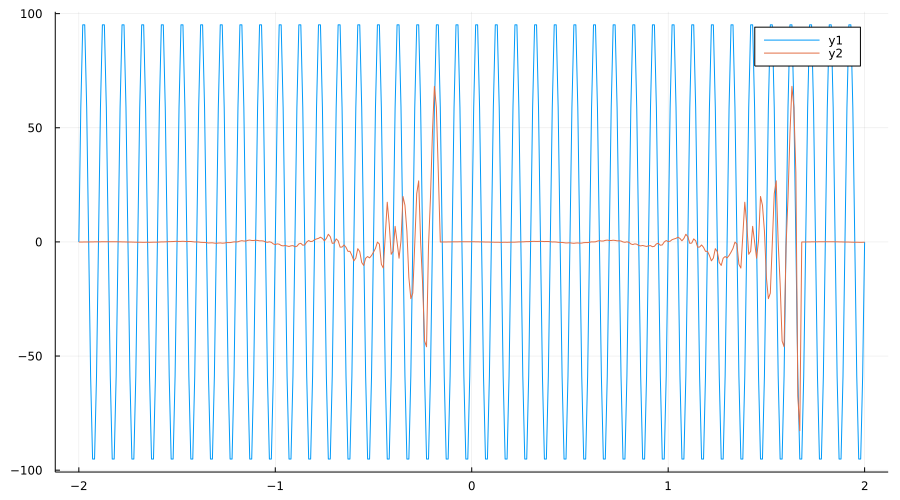

In [137]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [144]:
#normal function
#T from a to b with δt as step
a = -2.0
δt = 0.01
b = 2
T = a:δt:b
Y = 1/sqrt(2π)*exp.(-(T.^2)/2)
N = length(Y)
L = floor(Int, N/2)
M = 15
ϵ = 1e
##############################################################################################
#the algorithm

    #Hankel(first col,    lasr row  )
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
U, S, V = svd(I*Y1)                     #we could also work with svd(pinv(Y1))   
#if I wanna go with mr shishegar's code, I gotta use the meaningful eigenvalues! 
# and I'll do it:
S[abs.(S) .< ϵ] .= 0                    #zero out values smaller than treshold
Sr = S[abs.(S) .!= 0]                   #put nonzero values in "Sr" : means S reduced
(m,) = size(Sr)
Ur = U[:,1:m]
Vr = V[:,1:m]

Ze = inv(diagm(Sr))*Ur'*Y2*Vr
zi = (eigen(Ze).values) 
Poles = log.(z)/δt

#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zi)
vn = ceil(Int, N/m)
V = v
for i in 2:vn
    V = [V diagm(zi).^i*v]
end

Z = V[:, 1:N]
b = Y'*pinv(Z)
#parameters done!
Ypred = real.(b*Z)
Sr

2-element Vector{Float64}:
 61.71438866256754
 15.931065612486302

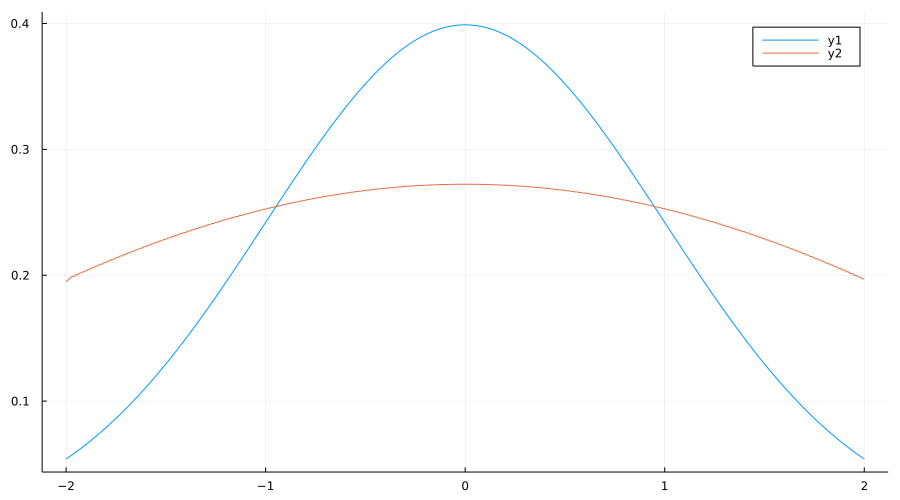

In [145]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [93]:
S

400-element Vector{ComplexF64}:
  11.130768226357942 + 0.18008345143055085im
  11.130768226357942 - 0.18008345143055085im
  1.0109546672658387 + 628.3185307179587im
  0.1868093254912695 + 612.9428392488151im
  0.1868093254912695 - 612.9428392488151im
 -0.5789623600882893 + 14.904887116358534im
 -0.5789623600882893 - 14.904887116358534im
  17.602013586515618 + 536.5889834255099im
  17.602013586515618 - 536.5889834255099im
  14.439335908153067 + 85.92997376706599im
  14.439335908153067 - 85.92997376706599im
  -5.944275107033334 + 14.986210299294788im
  -5.944275107033334 - 14.986210299294788im
                     ⋮
   -265.660629877291 + 308.75290621889025im
   -265.660629877291 - 308.75290621889025im
   -664.207543754118 + 274.9214997402767im
   -664.207543754118 - 274.9214997402767im
  -8.891961800509868 + 312.8369444415244im
  -8.891961800509868 - 312.8369444415244im
  -389.6965615815375 + 322.5576718230192im
  -389.6965615815375 - 322.5576718230192im
  -427.0234390940377 + 309.86788

In [94]:
z

400-element Vector{ComplexF64}:
    1.0572312217000013 + 0.0009519494940841278im
    1.0572312217000013 - 0.0009519494940841278im
    -1.005067570255827 + 0.0im
   -0.9979780294038605 + 0.07687452149671524im
   -0.9979780294038605 - 0.07687452149671524im
     0.994341736774528 + 0.0742402483856707im
     0.994341736774528 - 0.0742402483856707im
   -0.9791432055908651 + 0.483467323207692im
   -0.9791432055908651 - 0.483467323207692im
    0.9771738679026445 + 0.44773844365367754im
    0.9771738679026445 - 0.44773844365367754im
    0.9679921146605108 + 0.07266872137435872im
    0.9679921146605108 - 0.07266872137435872im
                       ⋮
   0.00716056474604306 + 0.2648296333179188im
   0.00716056474604306 - 0.2648296333179188im
  0.007040059524373456 + 0.03542252059559571im
  0.007040059524373456 - 0.03542252059559571im
 0.0063240465572700355 + 0.9564931364507709im
 0.0063240465572700355 - 0.9564931364507709im
 -0.005981690258685432 + 0.1423644823904879im
 -0.005981690258685432 - 0

In [174]:
# test with normal


#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 4
T = a:δt:b
Y = 1/sqrt(2π)*exp.(-(T.^2)/2)
N = length(Y)
L = floor(Int, N/2)
#whatch out this parameter
M = 9
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×1601 Matrix{Float64}:
 0.0432307  0.0291542  0.0179796  …  0.00808579  0.0158818  0.0259941

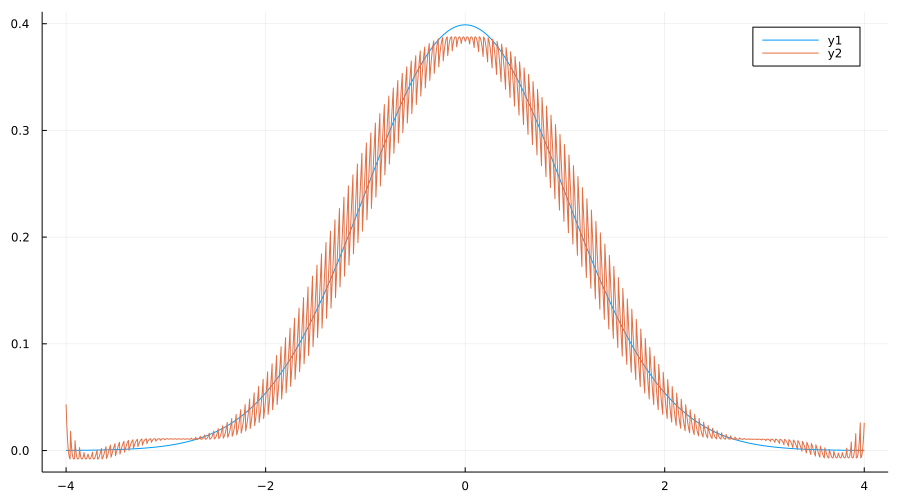

In [175]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))